# Exercise - Multiple Linear Regression



It's time for you to apply your knowledge to a new dataset. So that not too much changes come at once, we will stick to the cars topic and work with the **car seats data**. A company that makes car seats would like to construct a model to predict sales and they need your help!

You will find the file called `carseats.csv` in the data folder. It contains 400 observations on the following 11 variables:
* **Sales**:         Unit sales (in thousands) at each location
* **CompPrice**:     Price charged by competitor at each location
* **Income**:        Community income level (in thousands of dollars)
* **Advertising**:   Local advertising budget for company at each location (in thousands of dollars)
* **Population**:    Population size in region (in thousands)
* **Price**:         Price company charges for car seats at each site
* **ShelveLoc**:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* **Age**:           Average age of the local population
* **Education**:     Education level at each location
* **Urban**:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* **US**:            A factor with levels No and Yes to indicate whether the store is in the US or not

**(a) Load the data**

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

In [8]:
carseats = pd.read_csv("data/carseats.csv")
carseats.head()
#carseats.info()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**(b) Visualize the data with the appropriate plots.** 

<br>
<details><summary>
Click here for a hint…
</summary>
Check the documentation for seaborn's pair plots. 
</details>

first look at the data:
**Target variable:**
Sales → numeric (continuous) → dependent variable

**Numeric predictors:**
-  CompPrice
- Income
- Advertising
- Population
- Price
- Age
- Education

**Categorical predictors:**
- ShelveLoc (Bad / Medium / Good) → ordinal
- Urban (Yes / No) → binary
- US (Yes / No) → binary

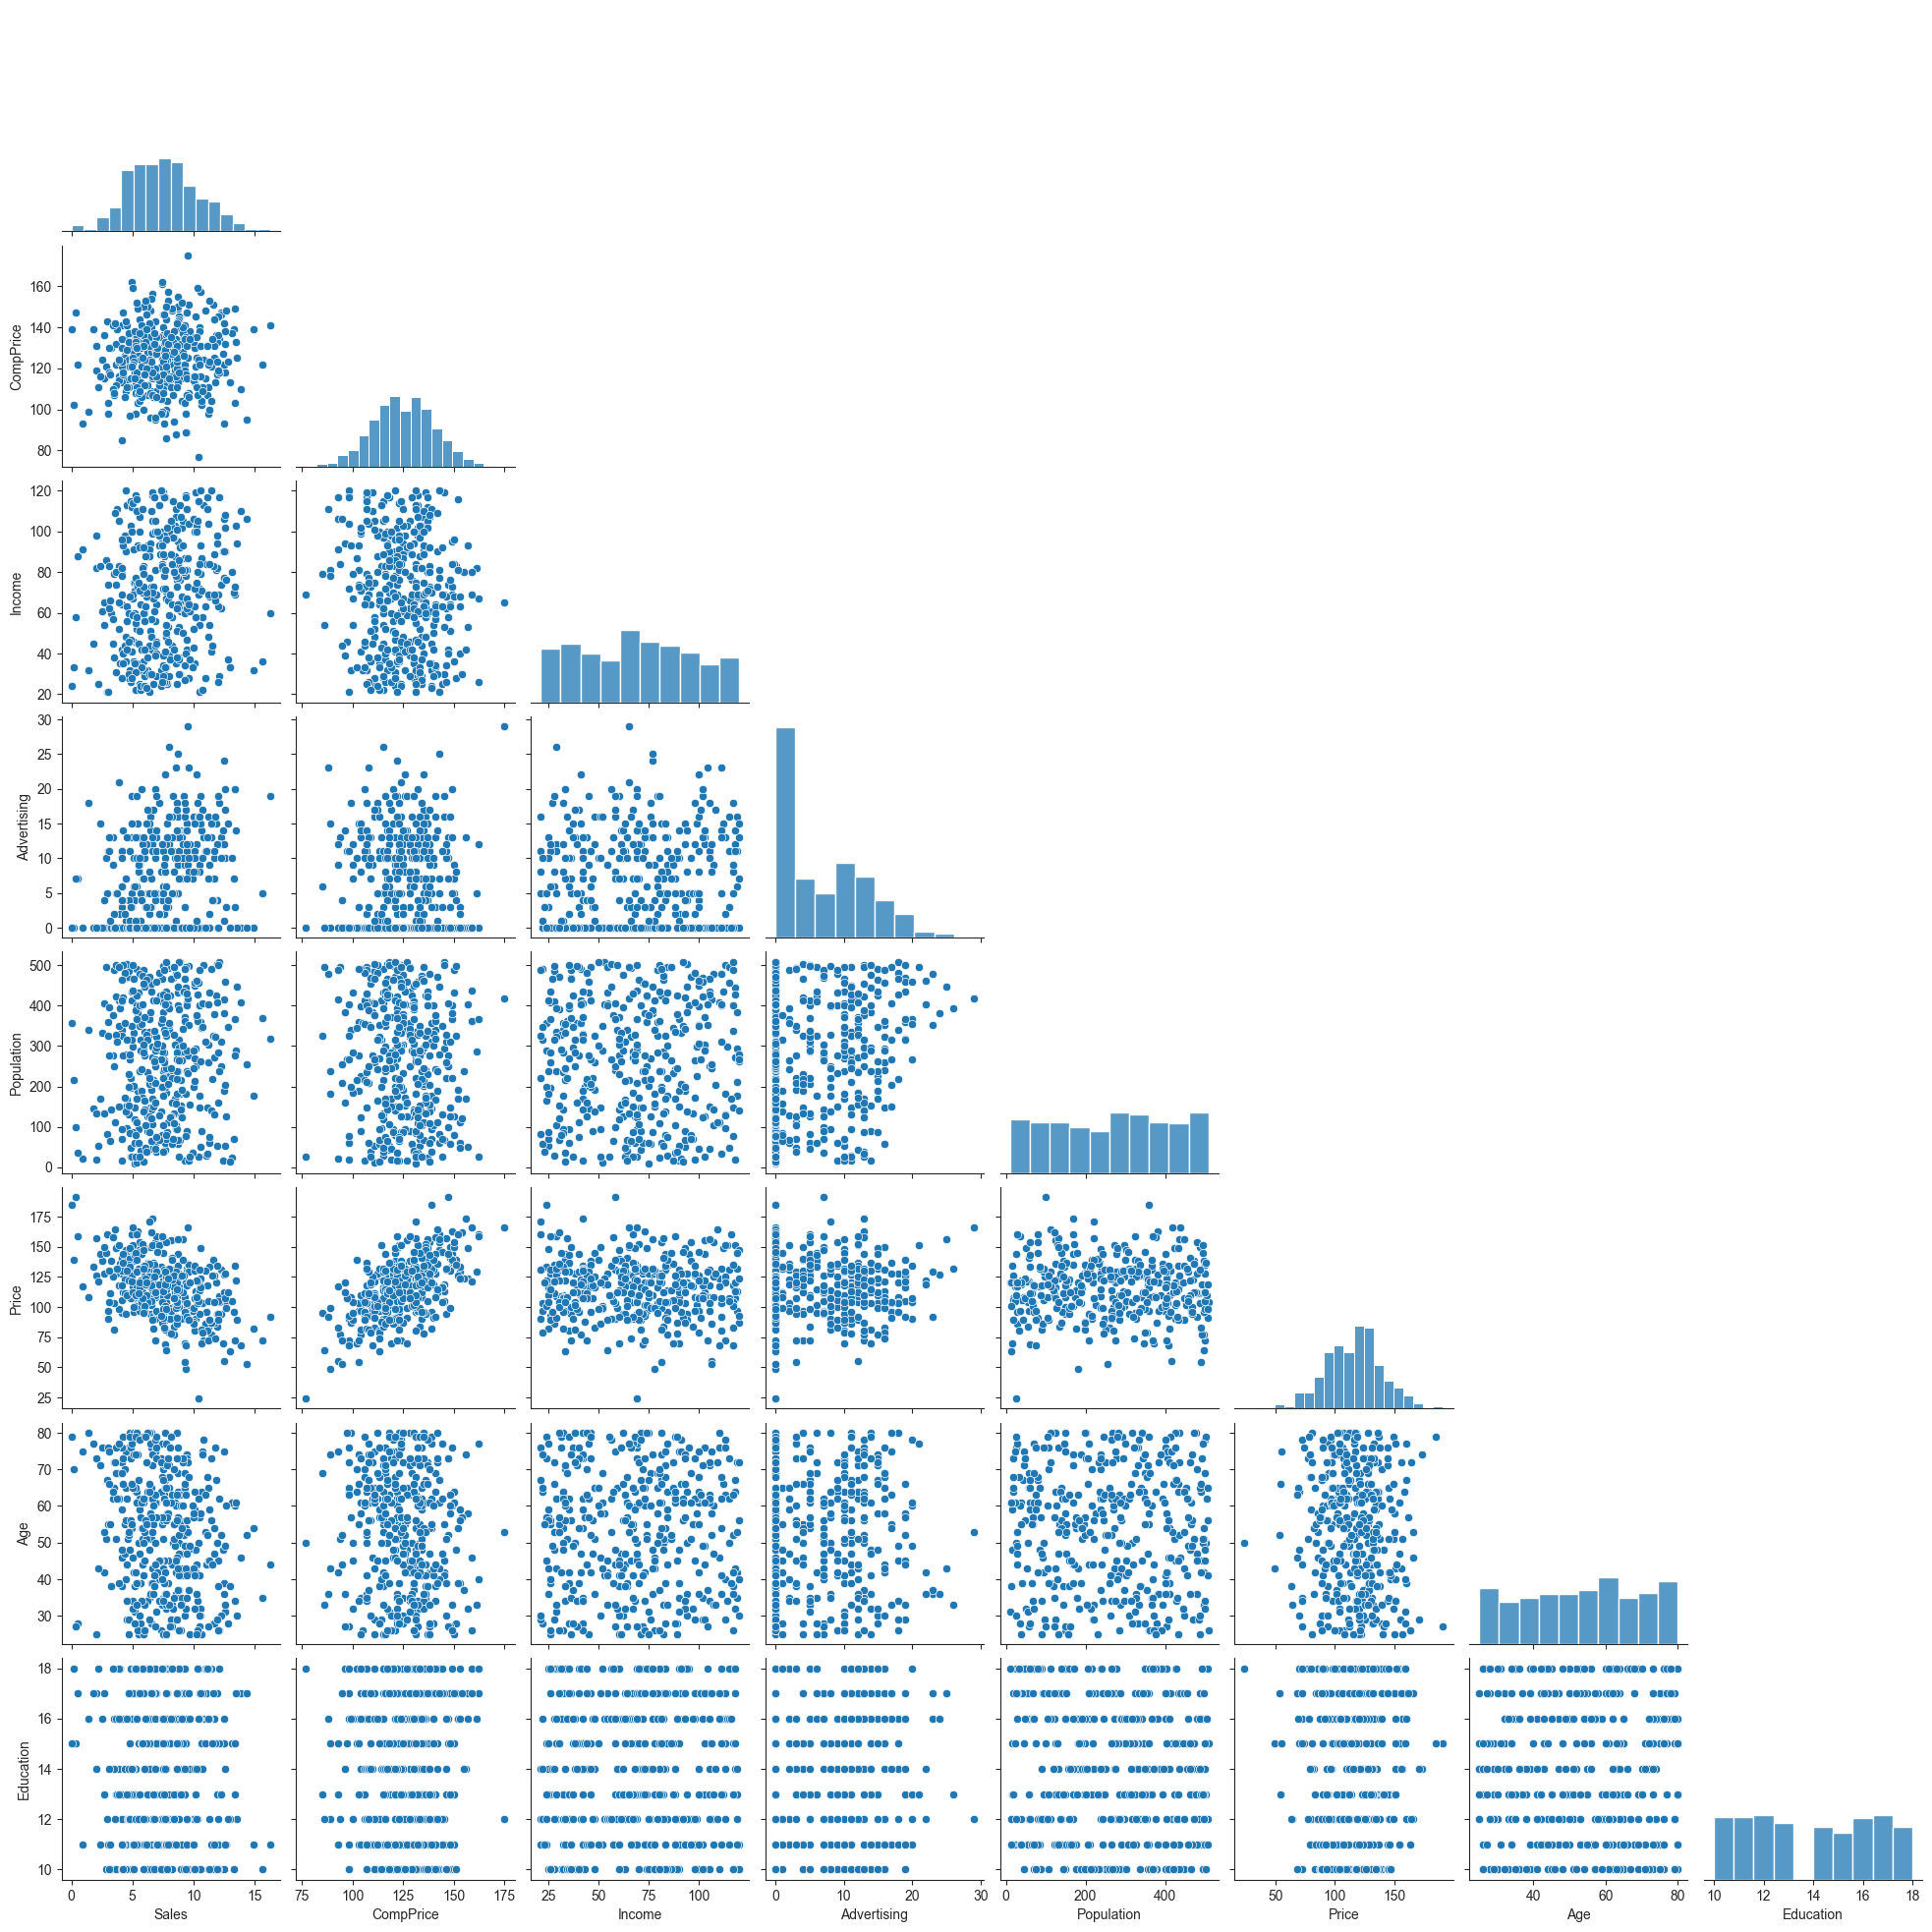

In [11]:
num_cols = [
    'Sales', 'CompPrice', 'Income', 'Advertising',
    'Population', 'Price', 'Age', 'Education'
]

#sns.pairplot(carseats[num_cols])
sns.pairplot(
    carseats[num_cols],
    diag_kind='hist',
    corner=True
)
plt.show()



Numerical continuous data

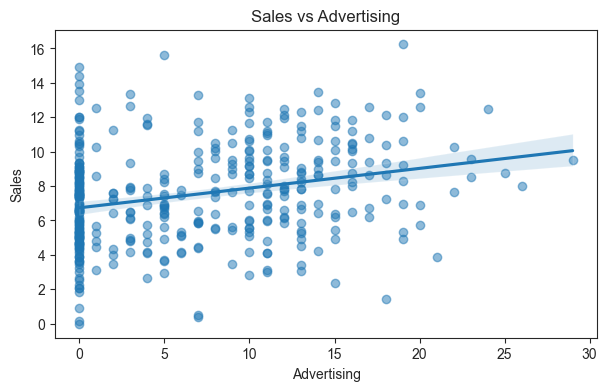

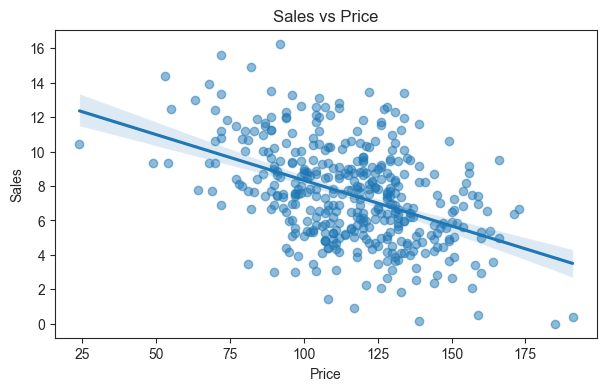

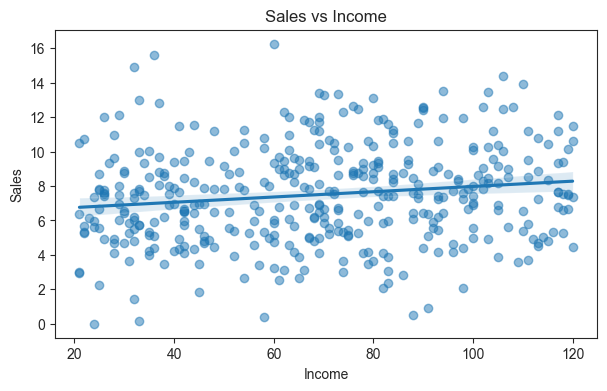

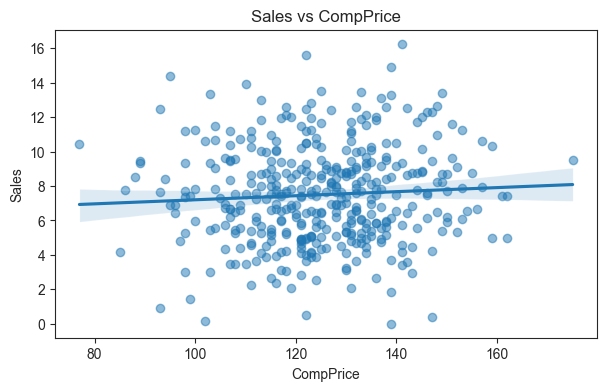

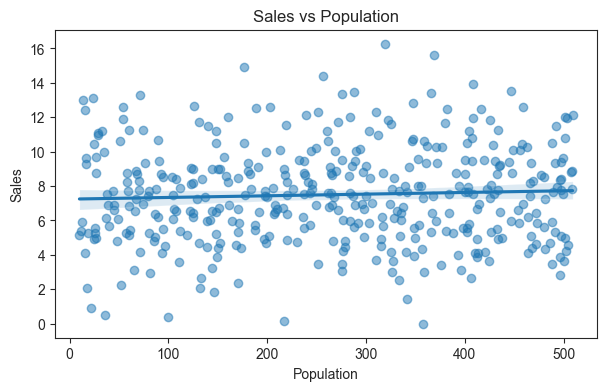

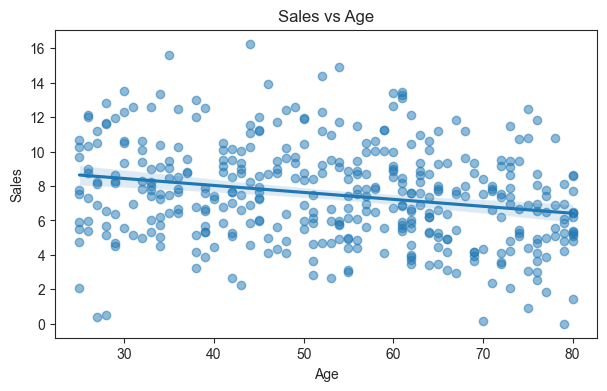

In [15]:
for col in ['Advertising', 'Price', 'Income', 'CompPrice', "Population", "Age"]:
    sns.regplot(data=carseats, x=col, y='Sales', scatter_kws={'alpha':0.5})
    plt.title(f"Sales vs {col}")
    plt.show()

Numerous discrete data

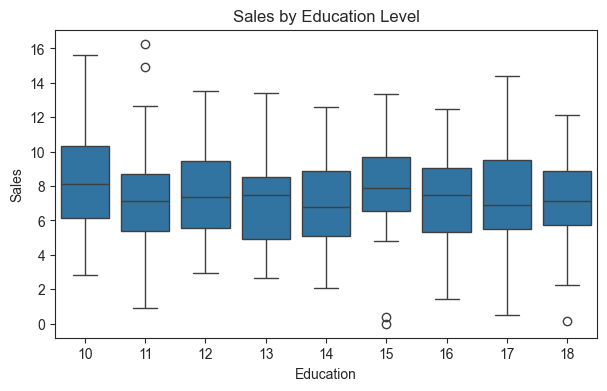

In [14]:
sns.boxplot(data=carseats, x='Education', y='Sales')
plt.title("Sales by Education Level")
plt.show()

categorical data

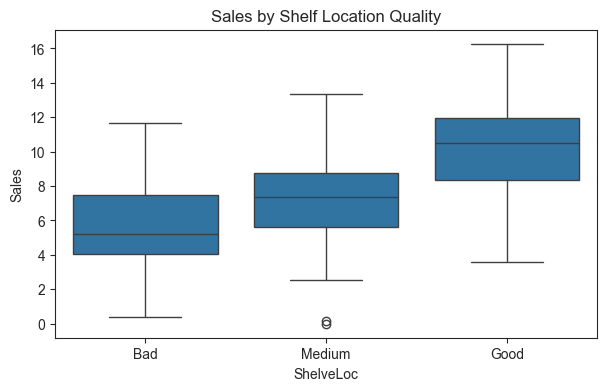

In [16]:
sns.boxplot(
    data=carseats,
    x='ShelveLoc',
    y='Sales',
    order=['Bad', 'Medium', 'Good']
)
plt.title("Sales by Shelf Location Quality")
plt.show()

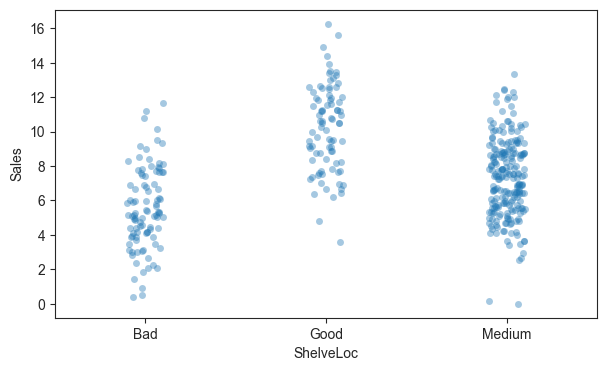

In [25]:
sns.stripplot(data=carseats, x='ShelveLoc', y='Sales', jitter=True, alpha=0.4)
plt.show()

In [19]:
carseats.US.unique()

array(['Yes', 'No'], dtype=object)

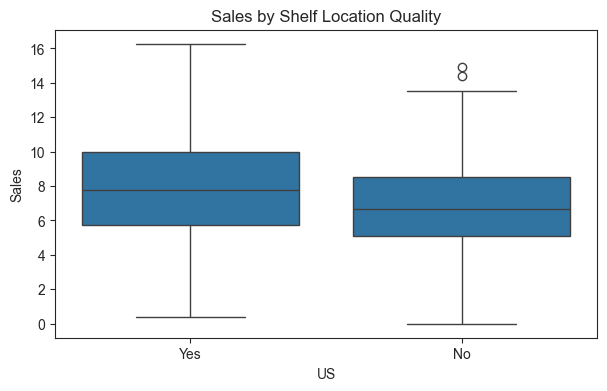

In [ ]:
sns.boxplot(
    data=carseats,
    x='US',
    y='Sales',
    #order=['Yes', 'No']
)
plt.title("US Sales vs. not US")
plt.show()

In [21]:
carseats.Urban.unique()

array(['Yes', 'No'], dtype=object)

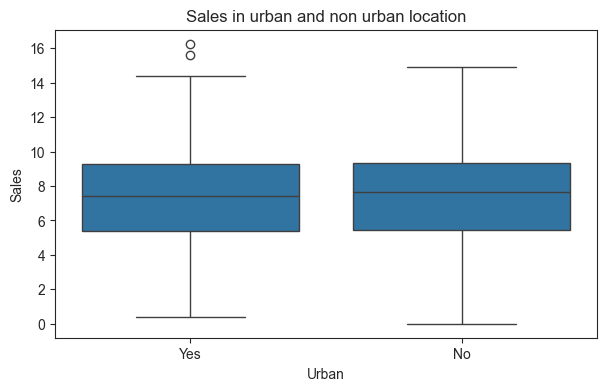

In [23]:
sns.boxplot(
    data=carseats,
    x='Urban',
    y='Sales',
    #order=['Yes', 'No']
)
plt.title("Sales in urban and non urban location")
plt.show()

**(c) What trends do you see in the data?**

- Advertising impacts the sales positively (the more advertisement -> more items are being sold)
- Price impacts the sales negatively (the higher the price -> the less it sells)
- Age impacts the sales negatively (the higher the age is -> less sells are made)
- Income has a minor positive impact over sales (the bigger the income, the higher the sales are)
- ShelveLoc impacts the sales positively (the better the location -> more items are being sold)
- US location has a minor positive impact over sales (in the US more items are being sold)


**(d) Find the single best predictor for a simple linear regression.**

<br>
<details><summary>
Click here for a hint…
</summary>
Fit a linear model to all possible explanatory variables and pick best one.
</details>

In [ ]:
# calculating R² for all Numeric predictors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

y = carseats['Sales']

predictors = [
    'Price', 'Advertising', 'Income', 'CompPrice',
    'Population', 'Age', 'Education'
]

results = []

for col in predictors:
    X = carseats[[col]]
    model = LinearRegression()
    model.fit(X, y)
    y_hat = model.predict(X)
    r2 = r2_score(y, y_hat)
    results.append((col, r2))

In [27]:
# calculating R² for all categorical predictors

X = pd.get_dummies(carseats['ShelveLoc'], drop_first=True)
model = LinearRegression()
model.fit(X, y)
r2 = r2_score(y, model.predict(X))
results.append(('ShelveLoc', r2))

X = pd.get_dummies(carseats['US'], drop_first=True)
model = LinearRegression()
model.fit(X, y)
r2 = r2_score(y, model.predict(X))
results.append(('US', r2))

X = pd.get_dummies(carseats['Urban'], drop_first=True)
model = LinearRegression()
model.fit(X, y)
r2 = r2_score(y, model.predict(X))
results.append(('Urban', r2))

In [28]:
# compare all the R²

results_df = pd.DataFrame(results, columns=['Predictor', 'R2'])
results_df.sort_values(by='R2', ascending=False)

,Predictor,R2
7,ShelveLoc,0.317236
0,Price,0.197981
1,Advertising,0.072634
5,Age,0.053738
8,US,0.031362
2,Income,0.023089
3,CompPrice,0.004106
6,Education,0.002699
4,Population,0.002547
9,Urban,0.000238


#### The single best predictor is: ShelveLoc with R² of 0.317

**(e) Fit a model with all possible explanatory variables.**

In [31]:
X = carseats.drop(columns='Sales')
X = pd.get_dummies(X, drop_first=True)

model = LinearRegression()
model.fit(X, y)

y_hat_full = model.predict(X)
r2_full = r2_score(y, y_hat_full)

print("R² (full model):", r2_full)


R² (full model): 0.8734133434127013


**(f) What's the best model according to $R^2$?**

The full model (with all the predictors) is the best model because its R² is the highest: 0.873 in comparison to the best model from the single predictors: ShelveLoc with R² of 0.317

**(g) Remove a couple of explanatory variables. How does $R^2$ change?**

In [37]:
X = carseats.drop(columns=['Sales', "CompPrice", "Population", "Education", "Urban"])
X = pd.get_dummies(X, drop_first=True)

model = LinearRegression()
model.fit(X, y)

y_hat = model.predict(X)
r2_reduced = r2_score(y, y_hat)

print("R² (reduced model):", r2_reduced)

R² (reduced model): 0.7074405035231024


The R² dropped from 0.873 to 0.707 after removing some explanatory variables

**(h) Repeat the process for the adjusted $R^2$.**

In [38]:
def adjusted_r_squared(r_squared, X):
    adjusted_r2 = 1 - ((1 - r_squared) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

adj_r2 = adjusted_r_squared(r2_reduced, X)
print("Adjusted R² (reduced model):", adj_r2)

Adjusted R² (reduced model): 0.7022162268003007


In [39]:
adj_r2 = adjusted_r_squared(r2_full, X)
print("Adjusted R² (full model):", adj_r2)

Adjusted R² (full model): 0.8711528674022138


**(i) What are your most interesting findings?**

The model with all possible explanatory variables is the most fit one with the highest Adjusted R² score, even in compariison to the model with only the strong predictors

<br>
<br> 
<br>

----